In [1]:
# import libraries

import pandas as pd
import numpy as np
import requests

In [2]:
"""
Deprecated due to API limit

# pull hdb resale transactions from data.gov.sg
url = 'https://data.gov.sg/api/action/datastore_search?resource_id=f1765b54-a209-4718-8d38-a39237f502b3'
response = requests.get(url)
data = response.json()

# set search limit to 10,000 records. API shows error when set at 15,000+ records
search_params = {'limit': 10000}

# get total number of records from website

response = requests.get(url, params=search_params)
data = response.json()

# convert data to dataframe
df = pd.DataFrame(data['result']['records'])

"""

"\nDeprecated due to API limit\n\n# pull hdb resale transactions from data.gov.sg\nurl = 'https://data.gov.sg/api/action/datastore_search?resource_id=f1765b54-a209-4718-8d38-a39237f502b3'\nresponse = requests.get(url)\ndata = response.json()\n\n# set search limit to 10,000 records. API shows error when set at 15,000+ records\nsearch_params = {'limit': 10000}\n\n# get total number of records from website\n\nresponse = requests.get(url, params=search_params)\ndata = response.json()\n\n# convert data to dataframe\ndf = pd.DataFrame(data['result']['records'])\n\n"

In [3]:
df = pd.read_csv('data/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158404 entries, 0 to 158403
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                158404 non-null  object 
 1   town                 158404 non-null  object 
 2   flat_type            158404 non-null  object 
 3   block                158404 non-null  object 
 4   street_name          158404 non-null  object 
 5   storey_range         158404 non-null  object 
 6   floor_area_sqm       158404 non-null  float64
 7   flat_model           158404 non-null  object 
 8   lease_commence_date  158404 non-null  int64  
 9   remaining_lease      158404 non-null  object 
 10  resale_price         158404 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.3+ MB


In [5]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [6]:
## convert resale_price to integer
df['resale_price'] = df['resale_price'].astype('float')

In [7]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [8]:
""" 
Classify Ang Mo Kio, Bedok, Bishan, Bukit Merah, Bukit Timah, Central, Clementi, Geylang, Kallang/Whampoa, Marine Parade, Pasir Ris, Queenstown, Serangoon, Tampines, Toa Payoh as Mature Estates

Classify Bukit Batok, Bukit Panjang, Choa Chu Kang, Hougang, Jurong, Punggol, Sembawang, Sengkang, Tengah, Woodlands, Yishun to be classified as Non-Matured Estates
"""

mature_estates = ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT MERAH', 'BUKIT TIMAH', 'CENTRAL AREA', 'CLEMENTI', 'GEYLANG', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'QUEENSTOWN', 'SERANGOON', 'TAMPINES', 'TOA PAYOH']
non_mature_estates = ['BUKIT BATOK', 'BUKIT PANJANG', 'CHOA CHU KANG', 'HOUGANG', 'JURONG', 'PUNGGOL', 'SEMBAWANG', 'SENGKANG', 'TENGAH', 'WOODLANDS', 'YISHUN']

# create new column to classify mature and non-mature estates
df['Estate Type'] = np.where(df['town'].isin(mature_estates), 'Matured Estate', 'Non-Matured Estate')

In [9]:
# convert month column to datetime
df['sale_period'] = pd.to_datetime(df['month'])

# split remaining_lease into months
df['remaining_lease_months'] = df['remaining_lease'].apply(lambda x: int(x.split(' ')[0])*12 + int(x.split(' ')[2]) if len(x.split(' ')) > 2 else int(x.split(' ')[0])*12)

In [10]:
# # reshuffle columns
df = df[['town',
         'Estate Type',
         'flat_type', 
         'flat_model', 
         'floor_area_sqm',
         'block',
         'street_name',
         'resale_price',
         'sale_period',
         'remaining_lease_months',
         'storey_range']]

In [11]:
# filter year column from 2017 onwards
df_filtered = df[df['sale_period'].dt.year >= 2017]


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

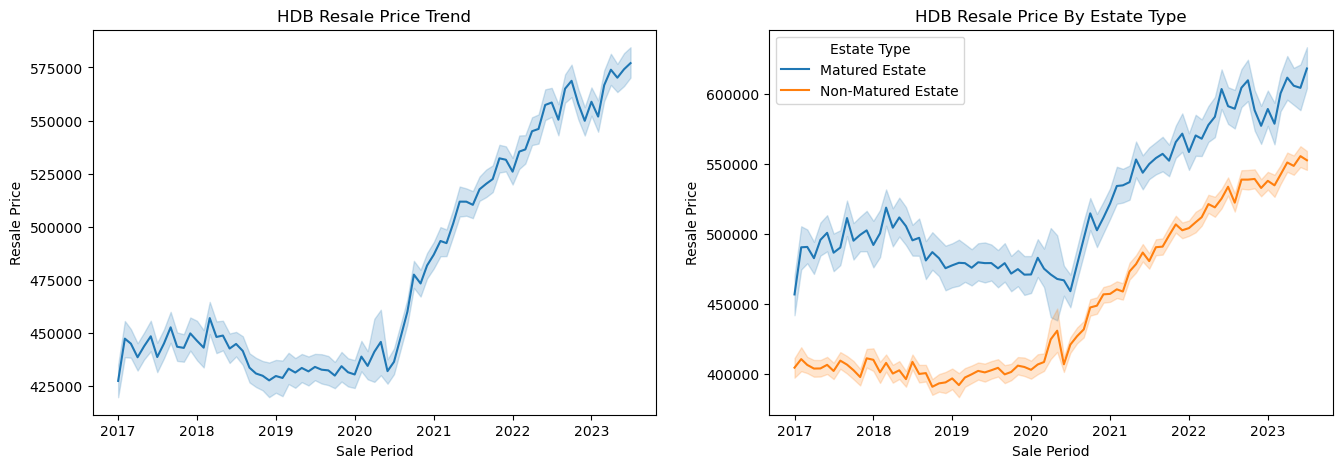

In [13]:
# create 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

# create seaborn lineplot in ax1
sns.lineplot(
    x='sale_period', 
    y='resale_price', 
    data=df_filtered,
    ax=ax1)
ax1.set_title('HDB Resale Price Trend')
ax1.set_ylabel('Resale Price')
ax1.set_xlabel('Sale Period')

# create seaborn lineplot in ax2
sns.lineplot(
    x='sale_period', 
    y='resale_price', 
    data=df_filtered,
    hue='Estate Type', 
    ax=ax2)
ax2.set_title('HDB Resale Price By Estate Type')
ax2.set_ylabel('Resale Price')
ax2.set_xlabel('Sale Period')

# display plots
plt.show()

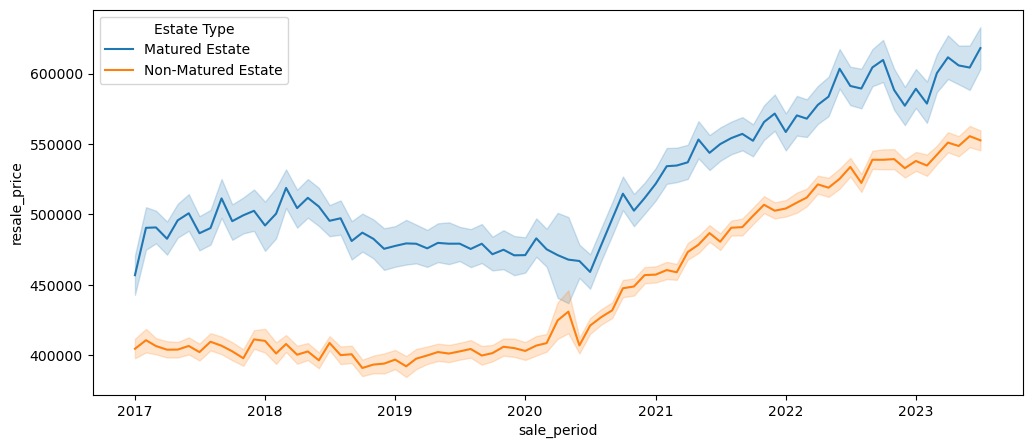

In [14]:
plt.subplots(figsize=(12,5))
sns.lineplot(x='sale_period', y='resale_price', data=df_filtered, hue='Estate Type')
plt.show()

In [15]:
num_towns = len(df['town'].unique())
print(num_towns)

26


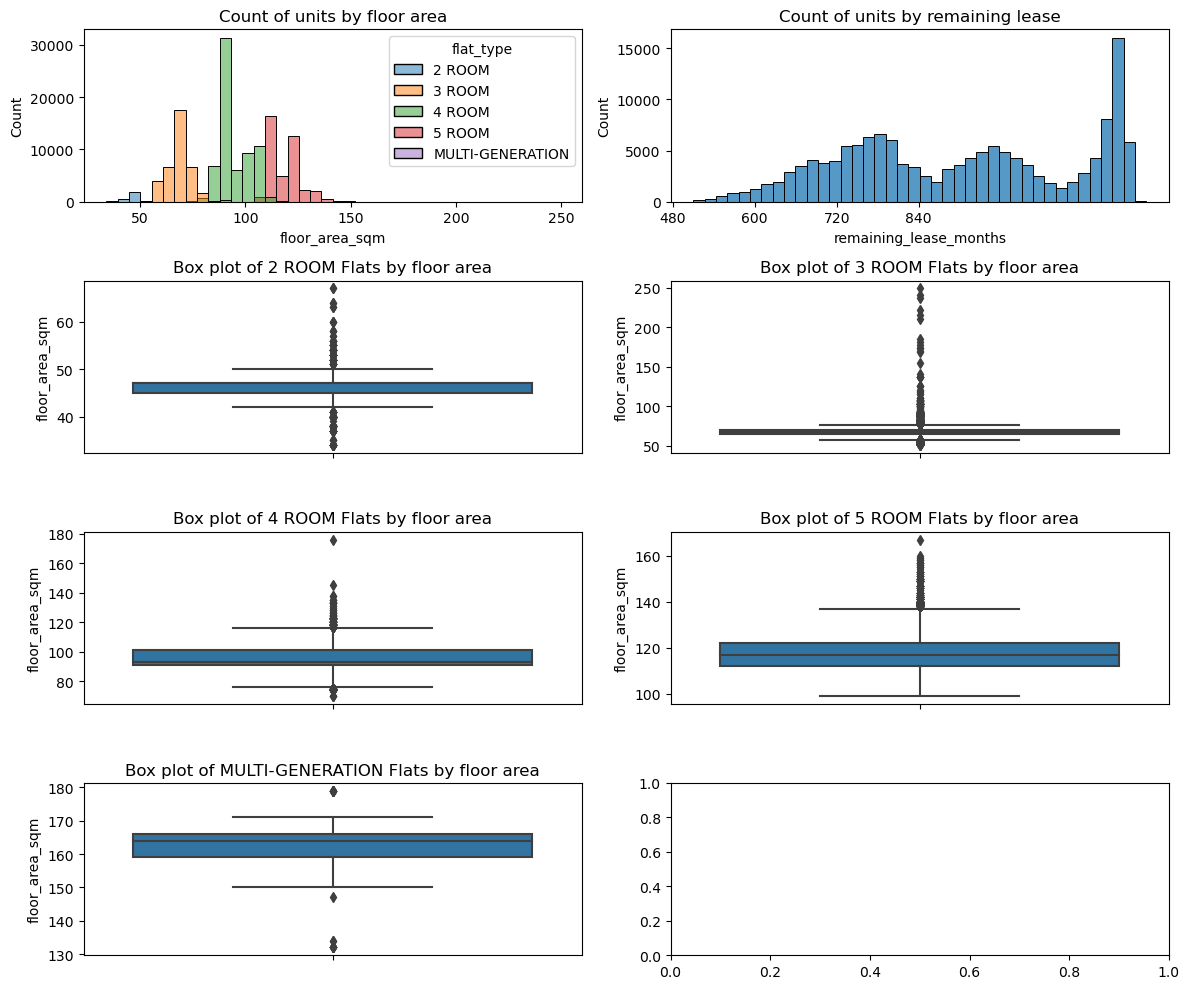

In [16]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2,figsize=(12,10))

df_filtered = df_filtered[(df_filtered['flat_type'] != '1 ROOM') & (df_filtered['flat_type'] != 'EXECUTIVE')]

# Plot 1: Count of units by floor area
sns.histplot(data = df_filtered, 
             x = 'floor_area_sqm',
             ax = ax1,
             bins = 40,
             hue = 'flat_type',)

ax1.set_title('Count of units by floor area')

# Plot 2: Count of units by remaining lease
sns.histplot(data = df_filtered,
             x = 'remaining_lease_months',
             ax = ax2,
             bins = 40)
ax2.set_title('Count of units by remaining lease')
ax2.set_xticks(np.arange(480, 960, 120))
ax2.set_xticklabels(np.arange(480, 960, 120))

# Plot 3: Box plot of 2 ROOM Flats by floor area
sns.boxplot(data = df_filtered[df_filtered['flat_type'] == '2 ROOM'],
            y = 'floor_area_sqm',
            ax = ax3)
ax3.set_title('Box plot of 2 ROOM Flats by floor area')

# Plot 4: Box plot of 3 ROOM Flats by floor area
sns.boxplot(data = df_filtered[df_filtered['flat_type'] == '3 ROOM'],
            y = 'floor_area_sqm',
            ax = ax4)
ax4.set_title('Box plot of 3 ROOM Flats by floor area')

# Plot 5: Box plot of 4 ROOM Flats by floor area
sns.boxplot(data = df_filtered[df_filtered['flat_type'] == '4 ROOM'],
            y = 'floor_area_sqm',
            ax = ax5)
ax5.set_title('Box plot of 4 ROOM Flats by floor area')

# Plot 6: Box plot of 5 ROOM Flats by floor area
sns.boxplot(data = df_filtered[df_filtered['flat_type'] == '5 ROOM'],
            y = 'floor_area_sqm',
            ax = ax6)
ax6.set_title('Box plot of 5 ROOM Flats by floor area')

# Plot 7: Box plot of MULTI-GENERATION Flats by floor area
sns.boxplot(data = df_filtered[df_filtered['flat_type'] == 'MULTI-GENERATION'],
            y = 'floor_area_sqm',
            ax = ax7)
ax7.set_title('Box plot of MULTI-GENERATION Flats by floor area')

plt.tight_layout()
plt.show()

In [17]:
print(f"Potential Count of Outliers: {len(df_filtered[(df_filtered['flat_type'] == '2 ROOM') & (df_filtered['floor_area_sqm'] > 50)])}")
print(f"Count of 2 ROOM Flats: {len(df_filtered[df_filtered['flat_type'] == '2 ROOM'])}")

Potential Count of Outliers: 92
Count of 2 ROOM Flats: 2549


Correlation coefficient:  0.39394747840994354


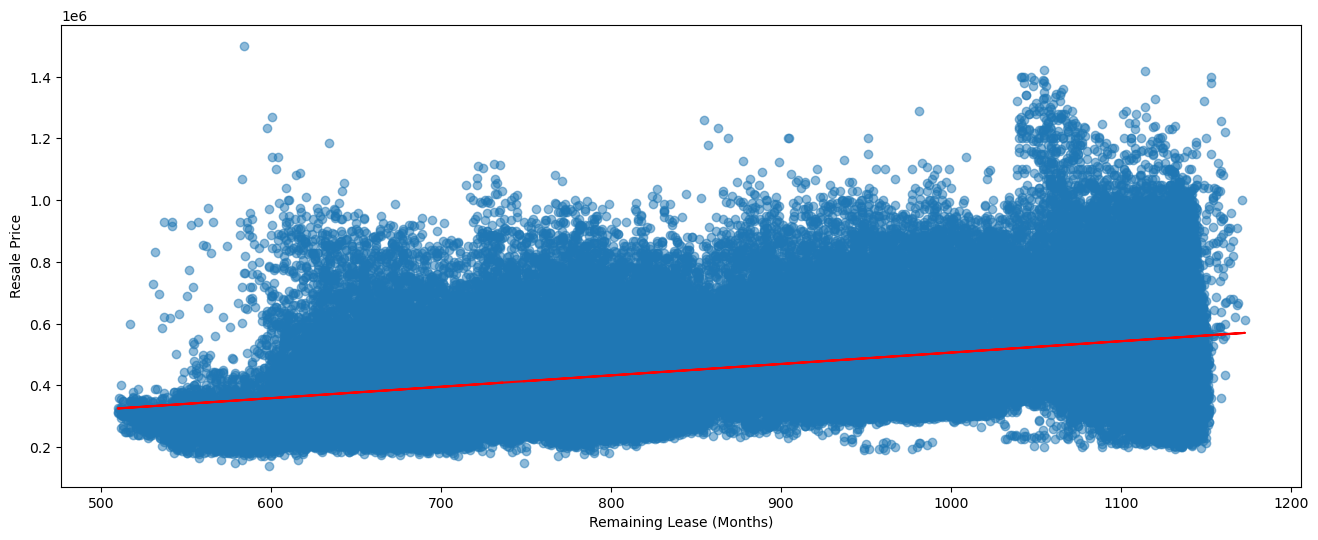

In [18]:
# resale price vs remaining lease months
# create scatter plot
plt.subplots(figsize=(16, 6))
plt.scatter(x=df_filtered['remaining_lease_months'], y=df_filtered['resale_price'], alpha=0.5)
plt.xlabel('Remaining Lease (Months)')
plt.ylabel('Resale Price')

# create linear regression line
x = df_filtered['remaining_lease_months']
y = df_filtered['resale_price']
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b, color='red')

# calculate correlation coefficient
corr = df_filtered['remaining_lease_months'].corr(df['resale_price'])
print('Correlation coefficient: ', corr)



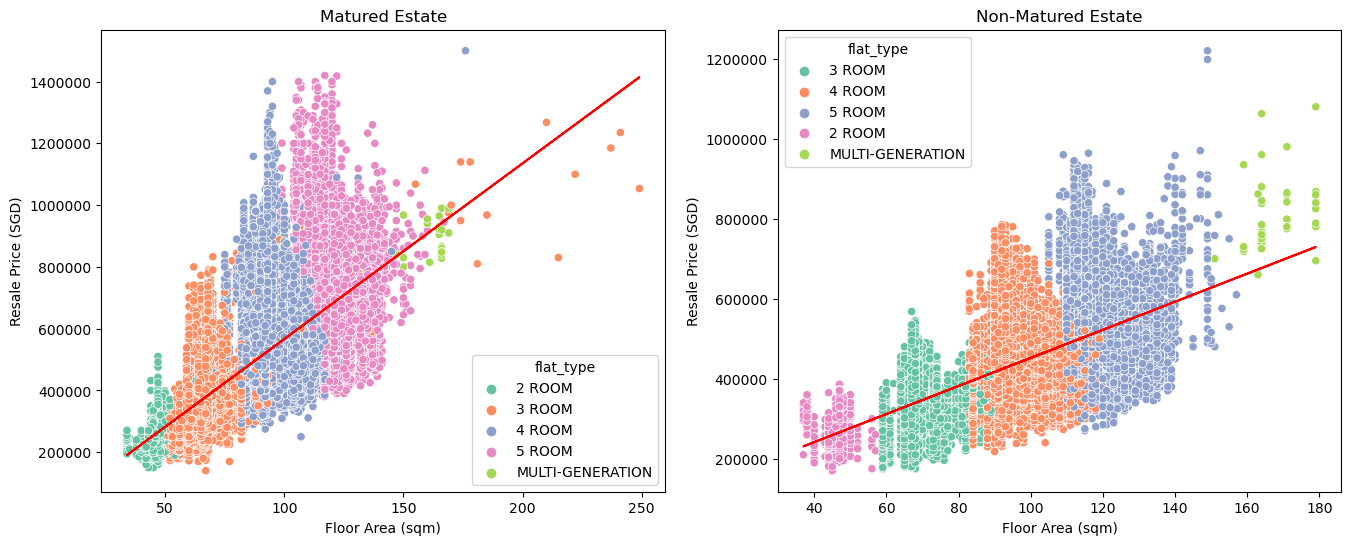

Correlation coefficient for matured estate:  0.6379002902959195
Correlation coefficient for non-matured estate:  0.5671898916900695


In [19]:
# resale price vs floor area split by estate type

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# plot resale price vs floor area by mature estates
sns.scatterplot(x='floor_area_sqm', 
                y='resale_price', 
                data=df_filtered[(df_filtered['Estate Type']=='Matured Estate') & (df_filtered['flat_type']!='1 ROOM')], 
                hue= 'flat_type', 
                ax=ax1,
                palette='Set2')

ax1.set_title('Matured Estate')
ax1.set_xlabel('Floor Area (sqm)')
ax1.set_ylabel('Resale Price (SGD)')

# show full y value without truncation
ax1.get_yaxis().get_major_formatter().set_scientific(False)

x = df_filtered[df_filtered['Estate Type']=='Matured Estate']['floor_area_sqm']
y = df_filtered[df_filtered['Estate Type']=='Matured Estate']['resale_price']
m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x + b, color='red')

# plot resale price vs floor area by non-mature estates
sns.scatterplot(x='floor_area_sqm', 
                y='resale_price', 
                data=df_filtered[df_filtered['Estate Type']=='Non-Matured Estate'], 
                hue= 'flat_type',
                ax=ax2,
                palette='Set2')

ax2.set_title('Non-Matured Estate')
ax2.set_xlabel('Floor Area (sqm)')
ax2.set_ylabel('Resale Price (SGD)')
ax2.get_yaxis().get_major_formatter().set_scientific(False)

x = df_filtered[df_filtered['Estate Type']=='Non-Matured Estate']['floor_area_sqm']
y = df_filtered[df_filtered['Estate Type']=='Non-Matured Estate']['resale_price']
m, b = np.polyfit(x, y, 1)
ax2.plot(x, m*x + b, color='red')

plt.show()

# identify correlation coefficient
print('Correlation coefficient for matured estate: ', df_filtered[df_filtered['Estate Type']=='Matured Estate']['floor_area_sqm'].corr(df_filtered[df_filtered['Estate Type']=='Matured Estate']['resale_price']))
print('Correlation coefficient for non-matured estate: ', df_filtered[df_filtered['Estate Type']=='Non-Matured Estate']['floor_area_sqm'].corr(df_filtered[df_filtered['Estate Type']=='Non-Matured Estate']['resale_price']))





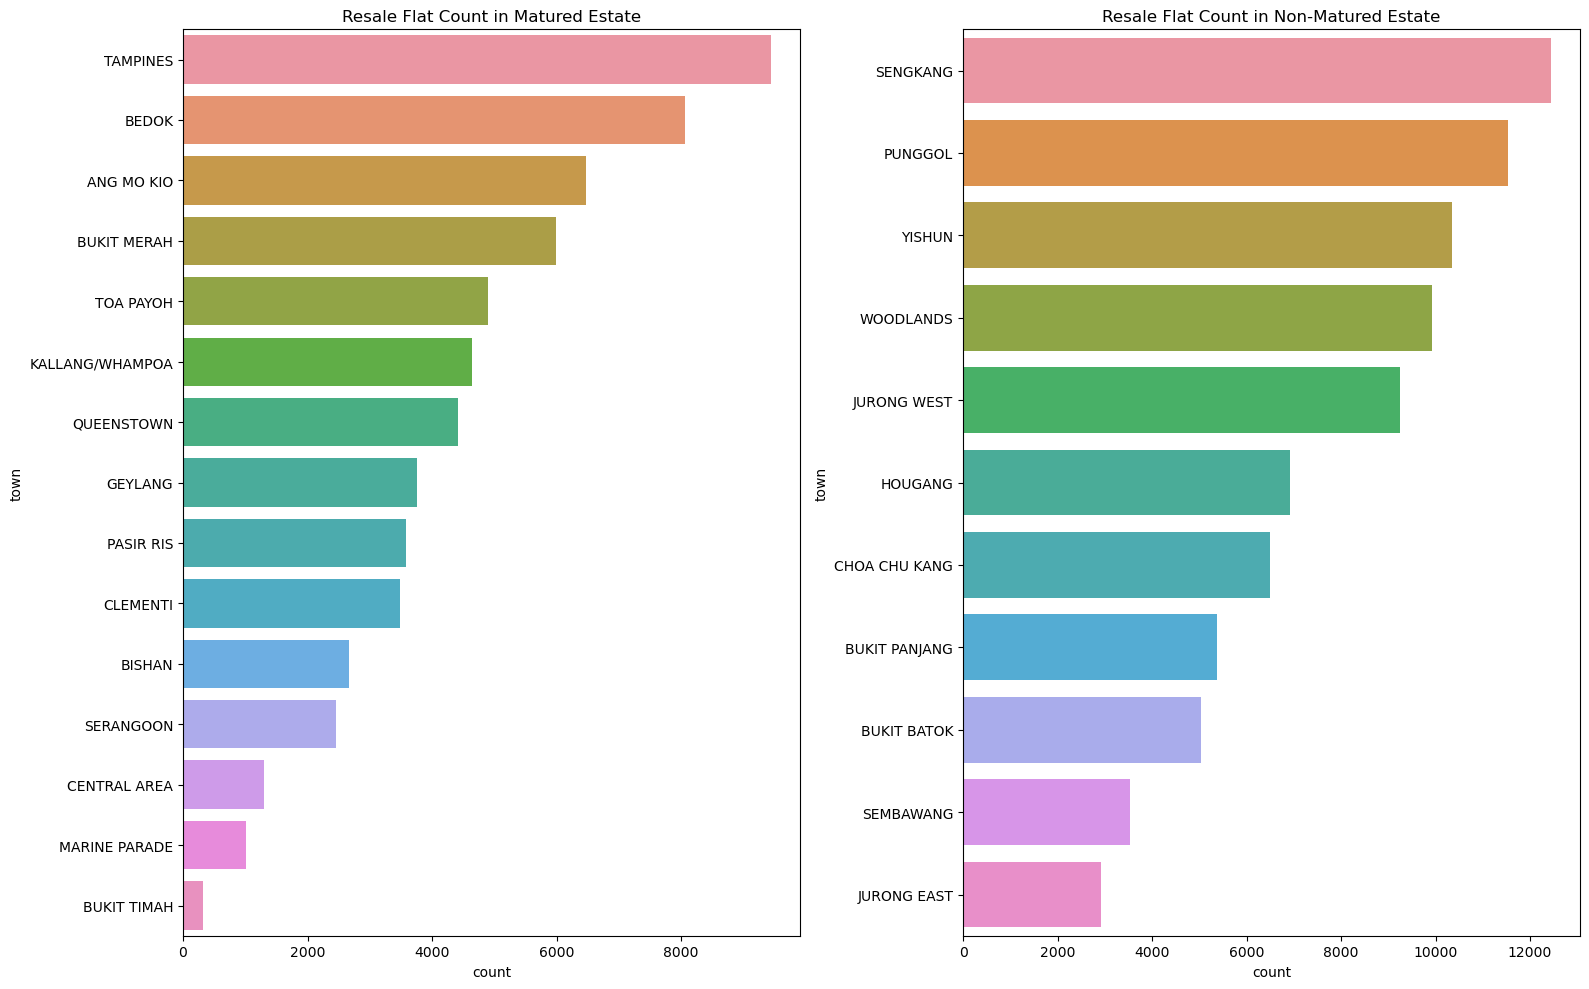

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 10))

# Plot 1: Count of resale flats in matured estates
sns.countplot(y='town',
              data = df_filtered[df_filtered['Estate Type'] == 'Matured Estate'],
              order = df_filtered[df_filtered['Estate Type'] == 'Matured Estate']['town'].value_counts().index,
              ax=ax1
              )

ax1.set_title('Resale Flat Count in Matured Estate')

# Plot 2: Counter of resale flats in non-matured estates
sns.countplot(y='town',
              data = df_filtered[df_filtered['Estate Type'] == 'Non-Matured Estate'],
              order = df_filtered[df_filtered['Estate Type'] == 'Non-Matured Estate']['town'].value_counts().index,
              ax=ax2
              )
ax2.set_title('Resale Flat Count in Non-Matured Estate')

plt.tight_layout()
plt.show()

In [24]:
# add new column 'psf' to the dataframe
# psf = price per square feet

df_filtered['psf'] = df_filtered['resale_price'] / (df_filtered['floor_area_sqm'] * 10.764)

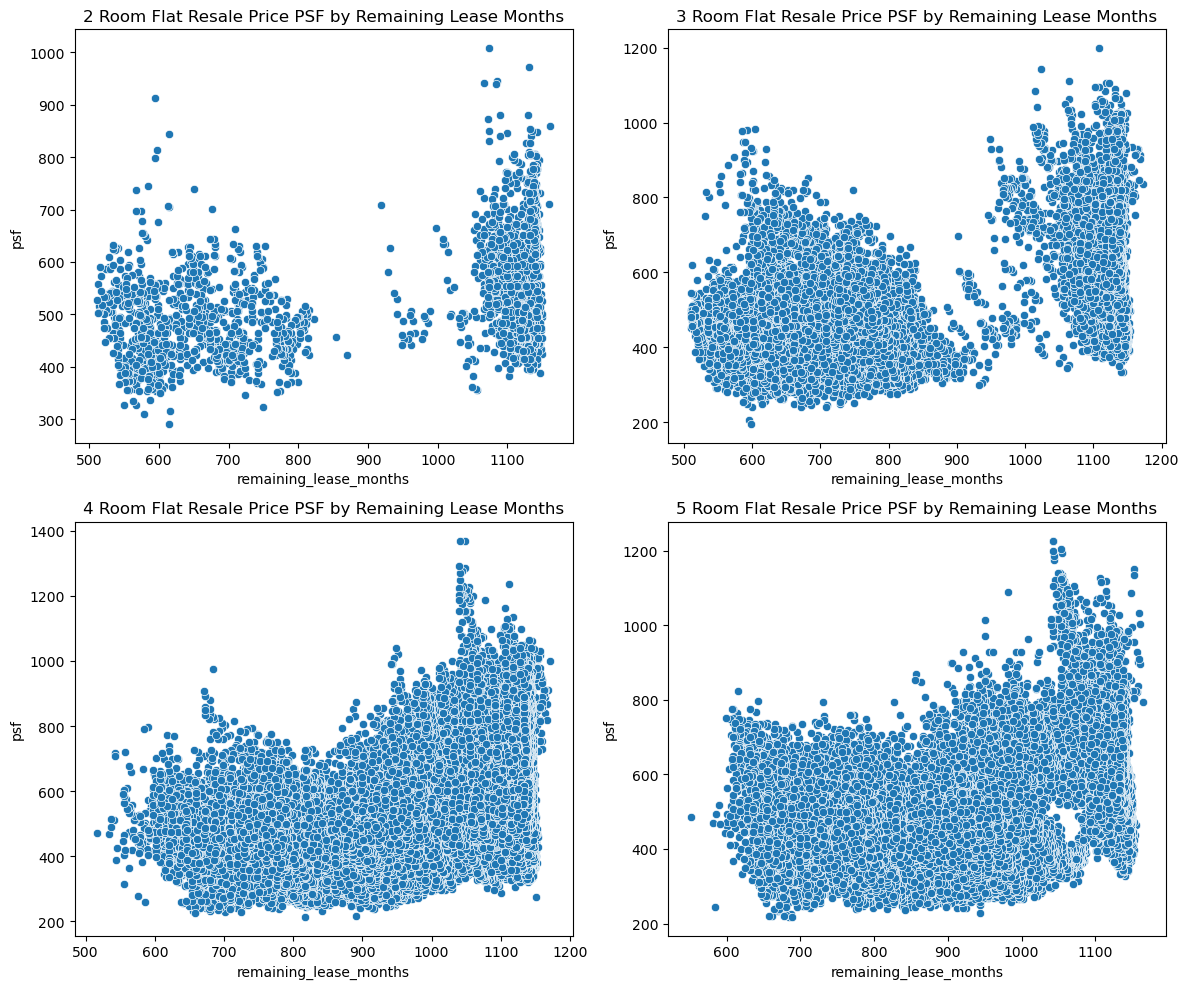

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(12,10))

df_filtered = df_filtered[(df_filtered['flat_type'] != '1 ROOM') & (df_filtered['flat_type'] != 'EXECUTIVE')]

# Plot 1: 2 ROOM Flat PSF by Remaining Lease Months

sns.scatterplot(data = df_filtered[df_filtered['flat_type'] == '2 ROOM'],
                x = 'remaining_lease_months',
                y = 'psf',
                ax = ax1)
ax1.set_title('2 Room Flat Resale Price PSF by Remaining Lease Months')

# Plot 2: 3 ROOM Flat PSF by Remaining Lease Months

sns.scatterplot(data = df_filtered[df_filtered['flat_type'] == '3 ROOM'],
                x = 'remaining_lease_months',
                y = 'psf',
                ax = ax2)
ax2.set_title('3 Room Flat Resale Price PSF by Remaining Lease Months')

# Plot 3: 4 ROOM Flat PSF by Remaining Lease Months

sns.scatterplot(data = df_filtered[df_filtered['flat_type'] == '4 ROOM'],
                x = 'remaining_lease_months',
                y = 'psf',
                ax = ax3)
ax3.set_title('4 Room Flat Resale Price PSF by Remaining Lease Months')

# Plot 5: 5 ROOM Flat PSF by Remaining Lease Months
sns.scatterplot(data = df_filtered[df_filtered['flat_type'] == '5 ROOM'],
                x = 'remaining_lease_months',
                y = 'psf',
                ax = ax4)
ax4.set_title('5 Room Flat Resale Price PSF by Remaining Lease Months')

plt.tight_layout()
plt.show()